<a href="https://colab.research.google.com/github/RupeshSharma14/ML-Algorithms/blob/main/Bias_and_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [ ]:
# Loading the data

import scipy.io as sio

data = sio.loadmat("/content/drive/MyDrive/Colab Notebooks/ex5data1.mat")
X = data["X"]
Xval = data["Xval"]
Xtest = data["Xtest"]
y = data["y"].reshape(len(X))
yval = data["yval"].reshape(len(Xval))
ytest = data["ytest"].reshape(len(Xtest))

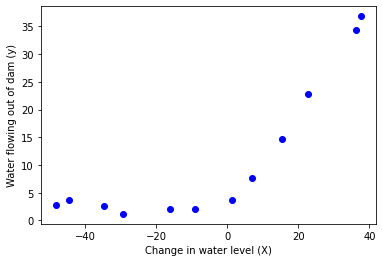

In [ ]:
# Visualization of training set

plt.plot(X, y, "bo")
plt.xlabel("Change in water level (X)")
plt.ylabel("Water flowing out of dam (y)");

In [ ]:
# Adding bias value

m, n = X.shape
x0 = np.ones((m, 1))
X = np.hstack((x0, X))
m, n = X.shape

mval, nval = Xval.shape
xval0 = np.ones((mval, 1))
Xval = np.hstack((xval0, Xval))
mval, nval = Xval.shape

In [ ]:
# Cost function

def cost_func(theta, X, y, _lambda):
  m = len(y)
  cost = (1 / (2*m)) * (X @ theta - y).T @ (X @ theta - y)
  regularization = (_lambda / (2 * m)) * np.sum(theta[1:] ** 2)
  return cost + regularization

In [ ]:
init_theta = np.ones(2)

cost_func(init_theta, X, y, _lambda = 1)

303.9931922202643

In [ ]:
# Gradient func

def gradient_func(theta, X, y, _lambda):
  gradient = (1 / m) * X.T @ ((X @ theta) - y)
  regularization = (_lambda / m) * theta
  regularization[0] = 0
  return gradient + regularization 

In [ ]:
gradient_func(init_theta, X, y, _lambda = 1)

array([-15.30301567, 598.25074417])

In [ ]:
# using CG to find theta

from scipy.optimize import minimize

_lambda = 0
args = (X, y, _lambda)
results = minimize(cost_func, init_theta, args, method = "CG", jac = gradient_func, options = {"maxiter": 50, "disp": 0})

theta = results.x
theta

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


array([13.08790734,  0.36777925])

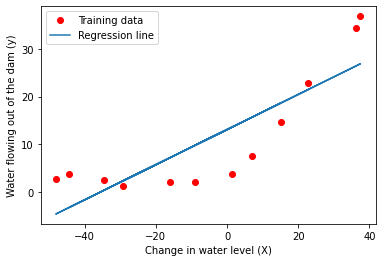

In [ ]:
# Visualization of Regression line

plt.plot(X[:, 1], y, 'ro', label = "Training data")
plt.plot(X[:, 1], X @ theta, label = "Regression line")
plt.xlabel("Change in water level (X)")
plt.ylabel("Water flowing out of the dam (y)")
plt.legend();

In [ ]:
# Learning Curve

def learning_curve(X, y, Xval, yval, _lambda):
  m, n = X.shape
  error_train = np.zeros((m ,1))
  error_val = np.zeros((m, 1))

  for i in range(1, m+1):
    X_ = X[:i]
    y_ = y[:i]

    args = (X_, y_, _lambda)
    init_theta = np.ones(n)
    result = minimize(cost_func, init_theta, args, method = "CG", jac = gradient_func, options = {"maxiter": 50, "disp": False})
    error_train[i-1] = result.fun
    theta = result.x
    error_val[i-1] = cost_func(theta, Xval, yval, _lambda)

  return error_train, error_val

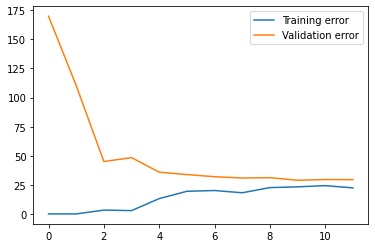

In [ ]:
error_train, error_val = learning_curve(X, y, Xval, yval, _lambda)
plt.plot(error_train, label = "Training error")
plt.plot(error_val, label = "Validation error")
plt.legend();

Linear regression causes high bias

In [ ]:
# Polynomial Regression
# Creating polynomial features

def poly_features(X, degree):
  m = len(X)
  X_poly = X
  for i in range(2, degree + 1):
    X_poly = np.hstack((X_poly, X ** i))

  return X_poly

In [ ]:
# Feature Scaling

def scaling(X):
  mu = X.mean(axis = 0)
  sigma = X.std(axis = 0)
  return (X - mu) / sigma, mu, sigma


In [ ]:
degree = 8

X_poly = poly_features(X[:, 1:], degree)
X_poly, mu, sigma = scaling(X_poly)
X_poly = np.hstack((np.ones((len(X), 1)), X_poly))

Xval_poly = poly_features(Xval[:, 1:], degree)
Xval_poly = (Xval_poly - mu) / sigma
Xval_poly = np.hstack((np.ones((len(Xval), 1)), Xval_poly))

Xtest_poly = poly_features(Xtest, degree)
Xtest_poly = (Xtest_poly - mu) / sigma
Xtest_poly = np.hstack((np.ones((len(Xtest), 1)), Xtest_poly))

In [ ]:
# Finding the parameters theta

_lambda = 0
args = (X_poly, y, _lambda)
init_theta = np.ones(degree+1)

results = minimize(cost_func, init_theta, args, method = "CG", jac = gradient_func, options = {"maxiter": 1000, "disp": True})

theta = results.x
theta

Optimization terminated successfully.
         Current function value: 0.028891
         Iterations: 508
         Function evaluations: 978
         Gradient evaluations: 978


array([ 11.21758603,   9.14169151,  18.19798588,  28.82714924,
       -27.36393295, -74.18730251,   7.06038364,  60.45182688,
        20.41102635])

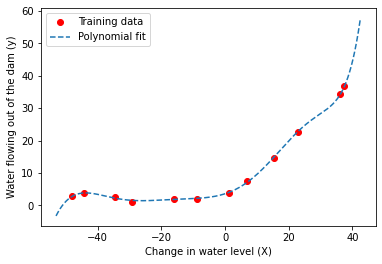

In [ ]:
# Visualization of Polynomial fit

plt.plot(X[:, 1], y, 'ro', label = "Training data")

space = np.array(np.arange(np.min(X) - 5, np.max(X) + 5, 0.05)).reshape(1912, 1)
X_poly_plt = poly_features(space, degree)
X_poly_plt = (X_poly_plt - mu) / sigma
X_poly_plt = np.hstack((np.ones((len(X_poly_plt), 1)), X_poly_plt))

plt.plot(space, X_poly_plt @ theta, "--", label = "Polynomial fit")
plt.xlabel("Change in water level (X)")
plt.ylabel("Water flowing out of the dam (y)")
plt.legend();

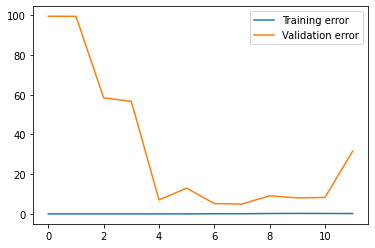

In [ ]:
# Learning Curve

error_train, error_val = learning_curve(X_poly, y, Xval_poly, yval, _lambda)
plt.plot(error_train, label = "Training error")
plt.plot(error_val, label = "Validation error")
plt.legend();

Polynomial Regression without Regularization causes high variance

In [ ]:
# Adjusting regularization

def plot_regularization(_lambda):
  args = (X_poly, y, _lambda)
  init_theta = np.ones(degree+1)
  result = minimize(cost_func, init_theta, args, method = "CG",
                    options = {"maxiter": 1000, "disp": False})
  theta = result.x

  plt.plot(X[:, 1], y, "ro", label = "Training data")
  
  space = np.array(np.arange(np.min(X) - 5, np.max(X) + 5, 0.05)).reshape(1912, 1)

  X_poly_plt = poly_features(space, degree)
  X_poly_plt = (X_poly_plt - mu) / sigma
  X_poly_plt = np.hstack((np.ones((len(X_poly_plt), 1)), X_poly_plt))

  plt.plot(space, X_poly_plt @ theta, "--", label = "Polynomial fit")
  plt.xlabel("Change in water level (X)")
  plt.ylabel("Water flowing out of the dam (y)")
  plt.legend()
  plt.show()

  error_train, error_val = learning_curve(X_poly, y, Xval_poly, yval, _lambda)
  plt.plot(error_train, label = "Training error")
  plt.plot(error_val, label = "Validation error")
  plt.legend();  

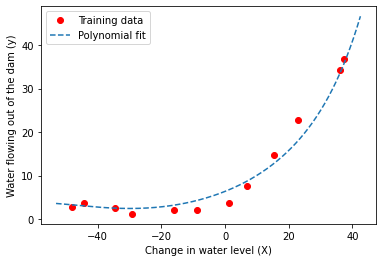

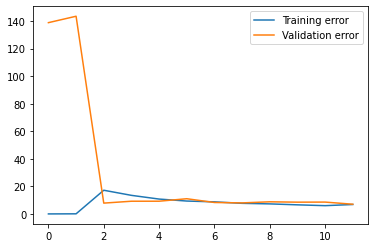

In [ ]:
# Good fit regularization

plot_regularization(1)

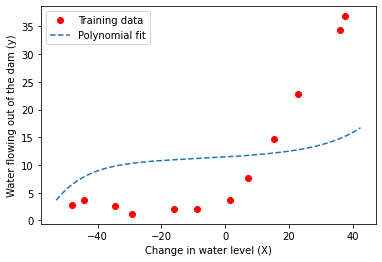

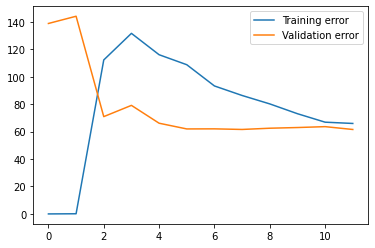

In [ ]:
# Too much regularization

plot_regularization(100)